In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Завдання
## варіант 
13
<br>
**частота дискретизації**
100 000 Гц = 100 КГц
<br>
**Розрядність представлення відліків сигналу, біт**
8 біт
<br>
**Параметр А випадкового сигналу**
0.5
<br>
**Параметр B випадкового сигналу**
1
<br>
Вивчається дискретизація гармонічного сигналу. Його частота в послідовних випробуваннях змінюється від fmin=Fs/8 до fmax=4Fs з кроком df=Fs/8.

## Хід роботи

### 1. Побудувати графік аналогового сигналу на інтервалі 2-3 періоди сигналу, використовуючи функцію plot.

In [52]:
# constants, functions and utils
NUM_OF_PERIODS_FOR_ANALOGUE = 11
NUM_OF_PERIODS_FOR_SAMPLING = 5
NUM_OF_DOTS_PER_PERIOD_RESTORED = 5
F_S = 100000*2*np.pi
F_CONST = F_S/4
A = 0.5
B = 1
NUM_OF_BITS = 8

def function(t,f):
    return np.cos(t*np.pi*2*f) #+ np.cos(t*np.pi*2*f/2) + np.cos(t*np.pi*2*f/3)

FUNCTION =np.vectorize(function)

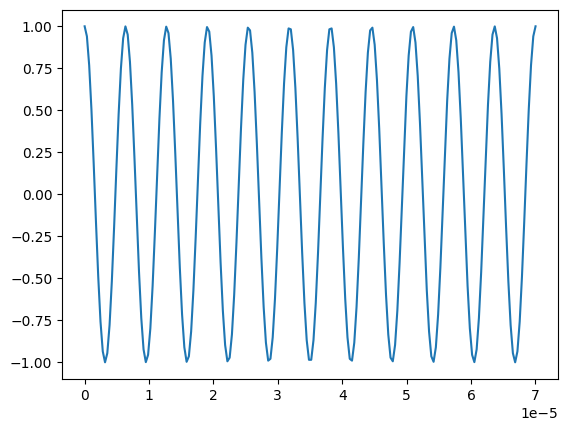

In [53]:
fig,AX = plt.subplots(1,1)
def plot_signal(num_of_periods,F,ax=AX,plot=True,return_values=False):
    T = 1/F
    numb_of_samples_per_period = 200
    num_samples = num_of_periods*numb_of_samples_per_period
    #print(f'F: {F}, T: {T},num_samples: {num_samples}')
    data_X = np.linspace(0,num_of_periods*T,numb_of_samples_per_period)
    data_Y = FUNCTION(data_X,F)
    if plot:
        ax.plot(data_X,data_Y,label='original')
    if return_values:
        return data_X,data_Y


plot_signal(NUM_OF_PERIODS_FOR_ANALOGUE,F_CONST)

### 2.	Використовуючи функцію stem, побудувати графік дискретизованого сигналу в тих же координатах.

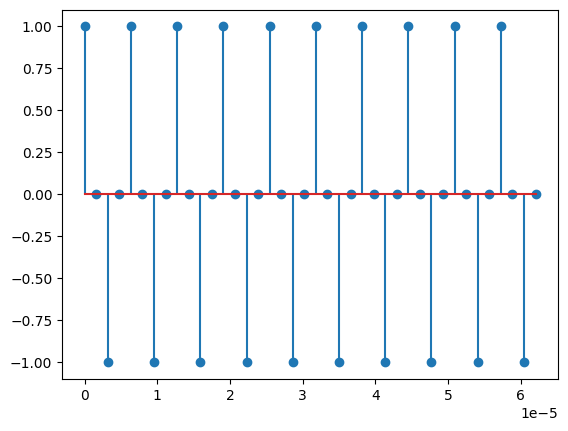

In [54]:
fig,AX = plt.subplots(1,1)
def plot_discrete_signal(num_periods,Fs,F,ax=AX,plot=True,return_values=False):
    T = 1/F
    Ts = 1/Fs
    #print(f'F: {F},T: {T}')
    data_X = np.arange(0*T,num_periods*T,Ts)
    data_Y = FUNCTION(data_X,F)
    if plot:
        ax.stem(data_X,data_Y)
    if return_values:
        return data_X,data_Y


plot_discrete_signal(10,F_S,F_CONST)

### 3.	Побудувати графік відновленого аналогового сигналу по дискретним відлікам за допомогою ряду Котельникова.

In [55]:
def create_restored_function(Fs,F,ax=AX):
    data_X,data_Y = plot_discrete_signal(11,Fs=Fs,F=F,ax=ax,plot=True,return_values=True)
    Ts = 1/Fs
    def restored_function_non_vectorized(t):
        res = 0
        for x,y in zip(data_X,data_Y):
            res += y * np.sinc((t-x)/Ts) ## Whittaker-Shannon interpolation 
        return res
    reconstructed_function = np.vectorize(restored_function_non_vectorized)
    return reconstructed_function,data_X,data_Y

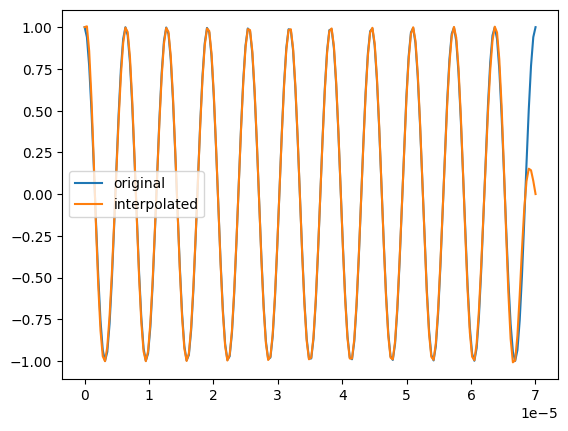

In [56]:
reconstructed_function,data_X_sampled,data_Y_sampled = create_restored_function(F_S,F_CONST)
X_values,Y_values_original = plot_signal(num_of_periods=11,F=F_CONST,plot=False,return_values=True)
Y_values_interpolated = reconstructed_function(X_values)
fig,ax =plt.subplots()
ax.plot(X_values,Y_values_original,label='original')
ax.plot(X_values,Y_values_interpolated, label='interpolated')
ax.legend()

### 4.	Визначити частоту відновленого сигналу.

In [57]:
# Fast Fourier Transform
data_X,data_Y = plot_discrete_signal(11,Fs=F_S,F=F_CONST,plot=False,return_values=True)
yf = fft(data_Y)
xf = fftfreq(len(data_Y), 1 / F_S)
ind = np.argmax(yf)
print(f'Frequency estimated after sampling: {abs(xf[ind])}, original frequency: {F_CONST}, difference: {abs(abs(xf[ind])-F_CONST)}')

Frequency estimated after sampling: 157079.63267948962, original frequency: 157079.63267948964, difference: 2.9103830456733704e-11


### 5.	Побудувати графік залежності частоти відновленого сигналу від частоти початкового сигналу. Пояснити його форму.

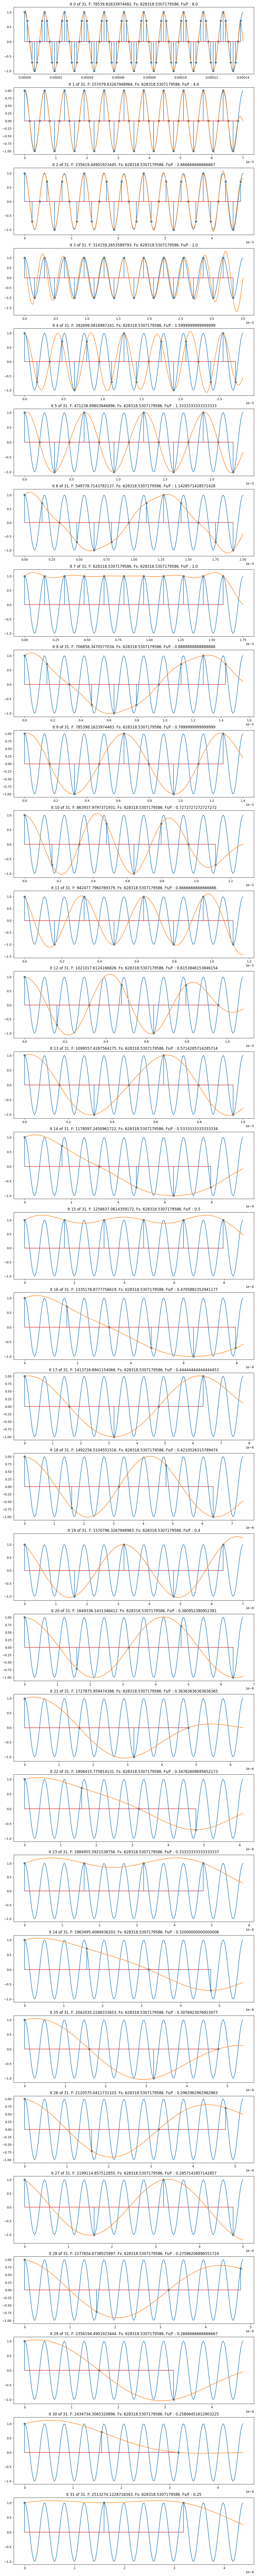

In [58]:
NUM_OF_ITERATIONS = 32
original_freq_range = np.linspace(F_S/8, 4*F_S, NUM_OF_ITERATIONS)
figs,axs = plt.subplots(32,1,figsize=(14,150))
estimated_frequences = []
for i,cur_F in enumerate(original_freq_range):
    cur_ax = axs[i]
    reconstructed_function,data_X_sampled,data_Y_sampled = create_restored_function(Fs=F_S,F=cur_F,ax=cur_ax)
    X_values,Y_values_original = plot_signal(num_of_periods=NUM_OF_PERIODS_FOR_ANALOGUE,F=cur_F,ax=cur_ax,plot=True,return_values=True)
    Y_values_interpolated = reconstructed_function(X_values)
    cur_ax.plot(X_values,Y_values_interpolated, label='interpolated')
    yf = fft(data_Y_sampled)
    xf = fftfreq(len(data_Y_sampled), 1 / F_S)
    ind = np.argmax(yf)
    estimated_frequence = abs(xf[ind])
    estimated_frequences.append(estimated_frequence)
    cur_ax.set_title(f'It {i} of {NUM_OF_ITERATIONS-1}. F: {cur_F}. Fs: {F_S}. Fs/F : {F_S/cur_F}')
    #print()
    #print(f'Frequency estimated after sampling: {estimated_frequence}, original frequency: {cur_F}, difference: {abs(abs(xf[ind])-F_CONST)}')

Text(0.5, 0, 'original_freq')

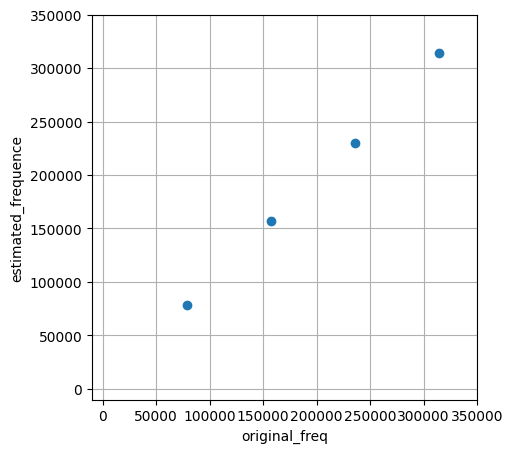

In [59]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(original_freq_range,estimated_frequences)
ax.grid()
#ax.gca().set_aspect("equal")
ax.set(xlim=(-10000, 350000), ylim=(-10000, 350000))
ax.set_aspect('equal')
ax.set_ylabel('estimated_frequence')
ax.set_xlabel('original_freq')

### 6.	Згенерувати дискретний сигнал, отриманий шляхом дискретизації аналогового гармонічного сигналу с частотою 3Fs/5 і тривалістю, достатньою для обчислення статистичних параметрів і побудови гістограм.

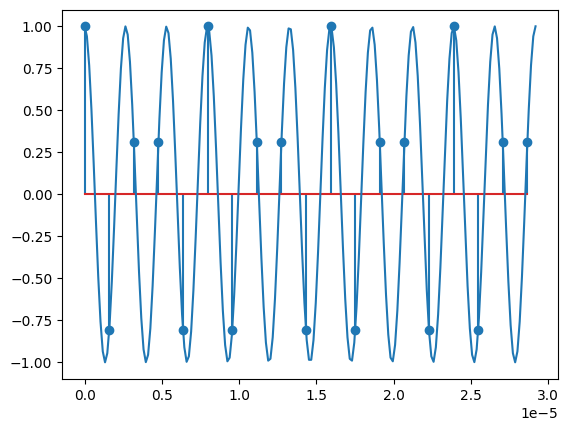

In [60]:
fig,ax = plt.subplots()
cur_F = 3/5*F_S
X_data,Y_data = plot_discrete_signal(num_periods=11,Fs=F_S,F=cur_F,plot=True,return_values=True,ax=ax)
plot_signal(11,cur_F,ax=ax)

### 7.	Виконати квантування дискретного сигналу, використовуючи округлення з кроком, який відповідає представленню відліків двійковими числами, розрядність яких задана в таблиці.

In [61]:
def quant(x):
    return np.round(2**NUM_OF_BITS*x)/2**NUM_OF_BITS

quant_np = np.vectorize(quant)
Y_data_quant = quant_np(Y_data)
Y_data_quant
# round(2**8*0.846)/2**8


array([ 1.        , -0.80859375,  0.30859375,  0.30859375, -0.80859375,
        1.        , -0.80859375,  0.30859375,  0.30859375, -0.80859375,
        1.        , -0.80859375,  0.30859375,  0.30859375, -0.80859375,
        1.        , -0.80859375,  0.30859375,  0.30859375])

### 8.	Обчислити похибку квантування. Розрахувати дисперсію, мінімальне і максимальне значення похибки. Порівняти отримані значення зі значеннями, обчисленими по формулам. Побудувати гістограму похибки (функция hist) і графік залежності похибки від часу.

mae: 0.0003341402960118557. min: 0.0. max: 0.0004232443749565551. error std: 0.00017254930690009781


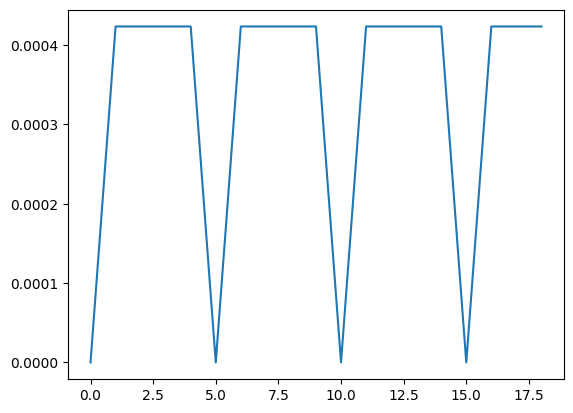

In [62]:
errors = np.abs(Y_data_quant-Y_data)
mae = np.mean(errors)
max_error = np.max(errors)
min_error = np.min(errors)
std = np.std(errors)

print(f'mae: {mae}. min: {min_error}. max: {max_error}. error std: {std}')
#plt.hist(errors)
plt.plot(errors)

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.]),
 array([0.00000000e+00, 4.23244375e-05, 8.46488750e-05, 1.26973312e-04,
        1.69297750e-04, 2.11622187e-04, 2.53946625e-04, 2.96271062e-04,
        3.38595500e-04, 3.80919937e-04, 4.23244375e-04]),
 <BarContainer object of 10 artists>)

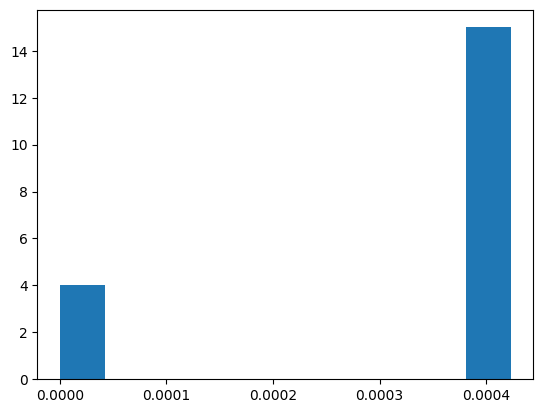

In [63]:
plt.hist(errors)

### 9.	Повтории п.п. 6-8 для сигналу з частотою Fs/sqrt(8). Порівняти розподіл похибки квантування з результатом п.3. Пояснити відмінності.

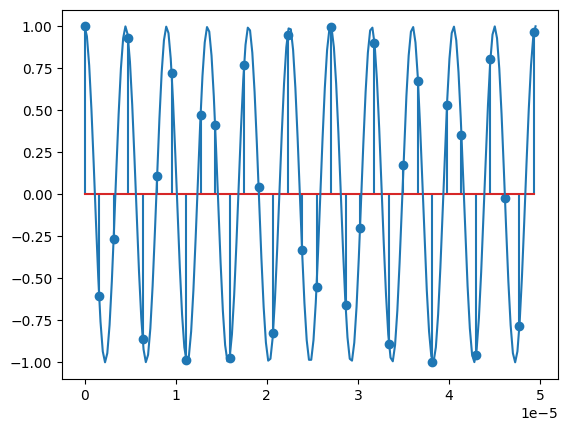

In [64]:
fig,ax = plt.subplots()
cur_F = F_S/np.sqrt(8)
X_data,Y_data = plot_discrete_signal(num_periods=11,Fs=F_S,F=cur_F,plot=True,return_values=True,ax=ax)
plot_signal(11,cur_F,ax=ax)

In [65]:
quant_np = np.vectorize(quant)
Y_data_quant = quant_np(Y_data)
Y_data_quant

array([ 1.        , -0.60546875, -0.265625  ,  0.9296875 , -0.859375  ,
        0.11328125,  0.72265625, -0.98828125,  0.47265625,  0.4140625 ,
       -0.9765625 ,  0.765625  ,  0.046875  , -0.82421875,  0.94921875,
       -0.328125  , -0.55078125,  0.99609375, -0.65625   , -0.203125  ,
        0.90234375, -0.890625  ,  0.17578125,  0.67578125, -0.99609375,
        0.53125   ,  0.35546875, -0.95703125,  0.80859375, -0.01953125,
       -0.78515625,  0.96875   ])

mae: 0.0008834043245722906. min: 0.0. max: 0.0018799084768559987. error std: 0.0005507298350164093


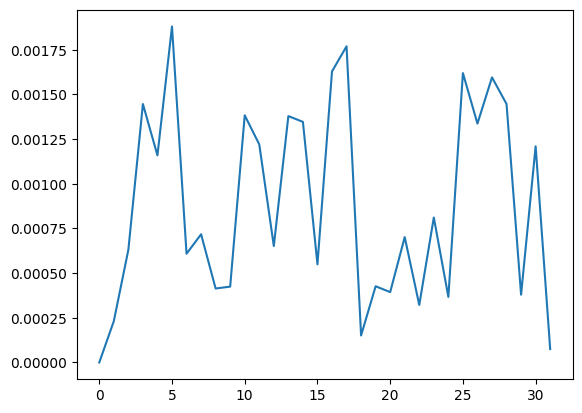

In [66]:
errors = np.abs(Y_data_quant-Y_data)
mae = np.mean(errors)
max_error = np.max(errors)
min_error = np.min(errors)
std = np.std(errors)

print(f'mae: {mae}. min: {min_error}. max: {max_error}. error std: {std}')
#plt.hist(errors)
plt.plot(errors)

(array([3., 3., 6., 5., 1., 0., 3., 6., 3., 2.]),
 array([0.        , 0.00018799, 0.00037598, 0.00056397, 0.00075196,
        0.00093995, 0.00112795, 0.00131594, 0.00150393, 0.00169192,
        0.00187991]),
 <BarContainer object of 10 artists>)

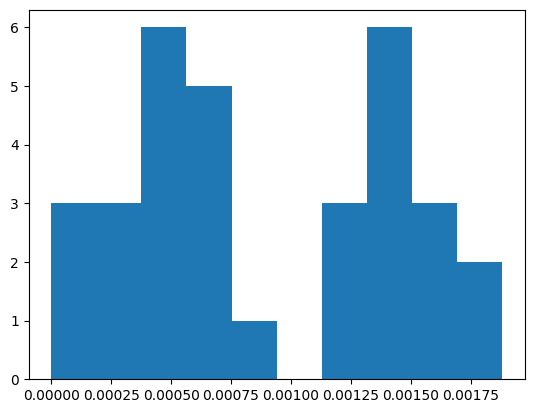

In [67]:
plt.hist(errors)

### 10.	Повторити п.п. 6-8 для нормального псевдовипадкового (середнєA, дисперсія D наведені в таблиці) сигналу, сформованого функцією normrnd. Порівняти розподіл похибки квантування з в пп.8, 9.

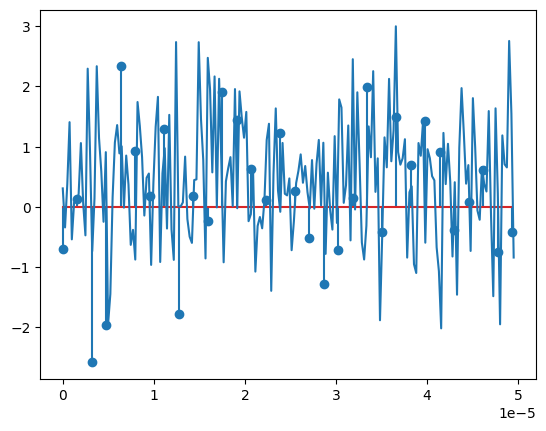

In [68]:
def random_func(x,f):
    return np.random.normal(A,B)

FUNCTION = np.vectorize(random_func)

fig,ax = plt.subplots()
cur_F = F_S/np.sqrt(8)
X_data,Y_data = plot_discrete_signal(num_periods=11,Fs=F_S,F=cur_F,plot=True,return_values=True,ax=ax)
plot_signal(11,cur_F,ax=ax)

In [69]:
quant_np = np.vectorize(quant)
Y_data_quant = quant_np(Y_data)
Y_data_quant

array([-0.70703125,  0.13671875, -2.578125  , -1.95703125,  2.33984375,
        0.93359375,  0.1875    ,  1.28515625, -1.7734375 ,  0.1796875 ,
       -0.2421875 ,  1.90234375,  1.4375    ,  0.62109375,  0.1171875 ,
        1.23046875,  0.26171875, -0.515625  , -1.27734375, -0.7109375 ,
        0.15625   ,  1.98046875, -0.4140625 ,  1.49609375,  0.69921875,
        1.4296875 ,  0.91015625, -0.3828125 ,  0.08203125,  0.60546875,
       -0.7421875 , -0.41796875])

mae: 0.0009956955361018864. min: 0.00029426935693366296. max: 0.0017616530910118389. error std: 0.0004946947966785019


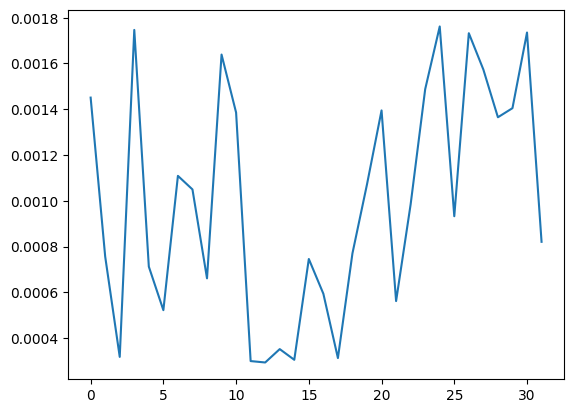

In [70]:
errors = np.abs(Y_data_quant-Y_data)
mae = np.mean(errors)
max_error = np.max(errors)
min_error = np.min(errors)
std = np.std(errors)

print(f'mae: {mae}. min: {min_error}. max: {max_error}. error std: {std}')
#plt.hist(errors)
plt.plot(errors)

(array([6., 2., 3., 4., 2., 3., 0., 5., 2., 5.]),
 array([0.00029427, 0.00044101, 0.00058775, 0.00073448, 0.00088122,
        0.00102796, 0.0011747 , 0.00132144, 0.00146818, 0.00161491,
        0.00176165]),
 <BarContainer object of 10 artists>)

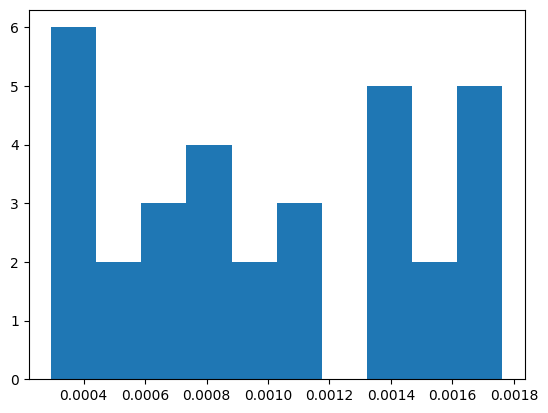

In [71]:
plt.hist(errors)

### 11.	Зробити висновки про характер похибки квантування і про справедливість теоретичної моделі похибки.

## Prev code

0.02291312692897525


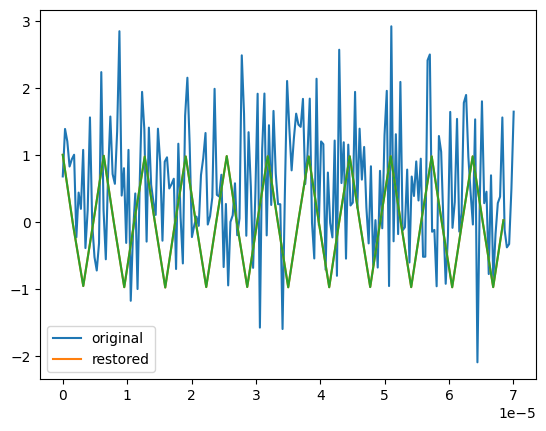

In [72]:
def restore_numpy_convolve(Fs,F,t):
    #N = 100
    T = 1/F
    Ts = 1/Fs
    data_X_s = np.arange(2*T,8*T,Ts)
    data_Y_s = np.cos(data_X_s*2*np.pi*F)
    sinc_component = np.sinc(np.pi*Fs*(t-data_X_s))
    res = np.convolve(data_Y_s,sinc_component,mode='valid')
    #intermediate_value_for_timestemp_t = np.dot(data_Y_s,sinc_component)
    #print(res,res2)
    #convolve_correct_size = len(res)//2
    #plt.plot(np.linspace(0,11*T,convolve_correct_size),res[:convolve_correct_size])
    #plt.plot(data_X_s,data_Y_s)
    #return intermediate_value_for_timestemp_t

def restore_own_convolve_implementation(Fs,F,ax):
    T = 1/F
    Ts = 1/Fs
    upper_boundary =11*T
    X_s = np.arange(0,upper_boundary,Ts)

    #X_r = np.arange(0,upper_boundary,step_size_restored)
    #len_X_r = len(X_r)
    
    Y_s = np.cos((X_s)*np.pi*2*F)

    sinc_component = np.sinc(np.pi*Fs*X_s)
    restored_full = np.convolve(sinc_component,Y_s,mode='full')

    #print(restored_full)
    #fig,ax = plt.subplots(1,1)
    

    #print(len_X_r)
    #print(len(X_s))
    #print(len(restored_full))
    ax.plot(X_s,restored_full[:len(X_s)],label='restored')
    #ax.plot(X_s,Y_s,label='original')
    #ax.plot(restored_full)
    #ax.legend()
    return X_s,restored_full,Y_s


X = np.linspace(0,NUM_OF_PERIODS_FOR_ANALOGUE*1/F_CONST,NUM_OF_PERIODS_FOR_ANALOGUE*10)
Y = []
for x in X:
   Y.append(restore_numpy_convolve(Fs=F_S,F=F_CONST,t=x))


fig,ax = plt.subplots(1,1)


#plt.plot(X,Y,':')
plot_signal(num_of_periods=NUM_OF_PERIODS_FOR_ANALOGUE,F=F_CONST,ax=ax)
restore_own_convolve_implementation(Fs=F_S,F=F_CONST,ax=ax)
ax.legend()
#restore_numpy_convolve(30,1,9.01)


X_s,restored_full,Y_s = restore_own_convolve_implementation(Fs=F_S,F=F_CONST,ax=ax)
#print(X_s)
print(np.mean(np.abs(restored_full[:len(Y_s)]-Y_s)))
